In [1]:
import pandas as pd
import seaborn as sns

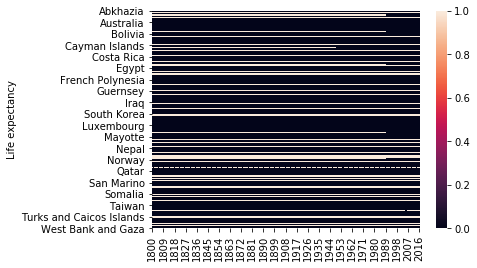

In [2]:
df = pd.read_excel("gapminder_lifeexpectancy.xlsx", index_col=0)
sns.heatmap(df.isna())

In [3]:
df = pd.read_excel("gapminder_lifeexpectancy.xlsx", index_col=0)
df.dropna(inplace=True)
df.shape

(201, 217)

In [4]:
df.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


## Title

# $\sum \alpha \frac{1}{3}$

`$\sum \alpha \frac{1}{3}$`

### 1. Move columns into the index and out again

In [5]:
df.reset_index(inplace=True)

In [6]:
df.head(3)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
1,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
2,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [7]:
df.set_index('Life expectancy', inplace=True)

In [8]:
df.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


### 2. Aggregation 

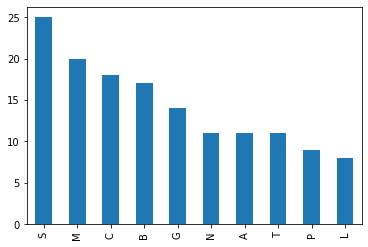

In [9]:
# top 10 initials
df.index.str[0].value_counts().head(10).plot.bar()

In [10]:
df['initial'] = df.index.str[0]

In [13]:
df['initial'].value_counts()

S    25
M    20
C    18
B    17
G    14
N    11
A    11
T    11
P     9
L     8
I     8
E     7
U     7
F     5
K     5
R     4
H     4
V     4
J     3
D     3
Z     2
W     2
Y     1
Q     1
O     1
Name: initial, dtype: int64

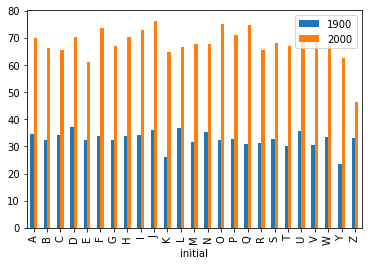

In [61]:
means = df.groupby('initial')[[1900, 2000]].mean()
means.plot.bar()

In [71]:
del df['initial']

### 3. Long vs Wide Format

* long format: select single data points, move columns around
* wide format: select row/column ranges

In [75]:
s = df.stack()  # DF / wide format --> long format (many many rows, 1 column)
s.shape

(43617,)

In [96]:
subset = s.sample(1000, random_state=42)
subset.head(3)

Life expectancy         
Fiji                1924    26.10
Aruba               1963    66.79
West Bank and Gaza  2003    74.40
dtype: float64

In [97]:
subset.unstack(0) # long format --> wide format (fewer rows, many columns)

Life expectancy,Fiji,Aruba,West Bank and Gaza,Ethiopia,Yemen,Libya,Tonga,Mali,Poland,Estonia,...,Turkey,St. Lucia,New Zealand,Argentina,Afghanistan,Vanuatu,Spain,Swaziland,Nepal,Zimbabwe
1924,26.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,66.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,74.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957,NaN,NaN,NaN,32.41,29.76,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1844,NaN,NaN,NaN,NaN,23.39,NaN,NaN,NaN,NaN,35.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1862,NaN,NaN,NaN,NaN,NaN,33.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.5,NaN,NaN,NaN
1901,NaN,NaN,NaN,NaN,NaN,NaN,28.20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.41,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,63.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.78,69.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
data = [
    ['Germany', 2000, 80, 1.5],
    ['Germany', 2010, 81, 1.4],
    ['Germany', 2020, 82, 1.3],
    
    ['Iran', 2000, 61, 2.5],
    ['Iran', 2010, 70, 2.4],
    ['Iran', 2020, 80, 2.3],    
]

x = pd.DataFrame(data, columns=['country', 'year', 'pop', 'fert'])
x.set_index(['country', 'year'], inplace=True)
x

pop  fert
country year           
Germany 2000   80   1.5
        2010   81   1.4
        2020   82   1.3
Iran    2000   61   2.5
        2010   70   2.4
        2020   80   2.3

In [112]:
y = x.stack()
y

country  year      
Germany  2000  pop     80.0
               fert     1.5
         2010  pop     81.0
               fert     1.4
         2020  pop     82.0
               fert     1.3
Iran     2000  pop     61.0
               fert     2.5
         2010  pop     70.0
               fert     2.4
         2020  pop     80.0
               fert     2.3
dtype: float64

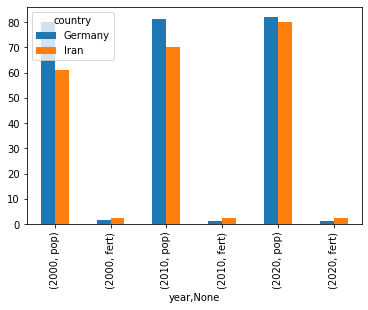

In [116]:
y.unstack(0).plot.bar()

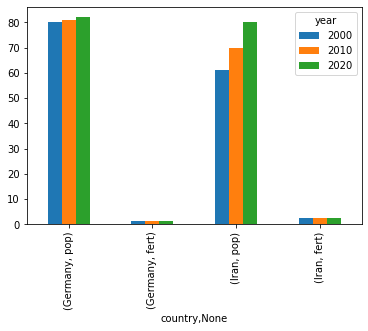

In [117]:
y.unstack(1).plot.bar()

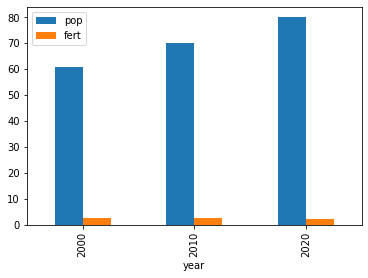

In [120]:
y.unstack(2).loc['Iran'].plot.bar()

In [132]:
y.unstack((0,1)).unstack().unstack().unstack()

pop             fert          
year     2000  2010  2020 2000 2010 2020
country                                 
Germany  80.0  81.0  82.0  1.5  1.4  1.3
Iran     61.0  70.0  80.0  2.5  2.4  2.3